In [1]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, ReLU, LeakyReLU
from keras.callbacks import EarlyStopping

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
house_data = fetch_california_housing()

In [6]:
# print(house_data.DESCR)

In [7]:
X = house_data.data
y = house_data.target

In [8]:
X = pd.DataFrame(data=X, columns=house_data.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
data = X.copy()

In [10]:
data['Price'] = y

In [11]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
import sweetviz

In [13]:
report = sweetviz.analyze(data, target_feat='Price')

                                             |                                             | [  0%]   00:00 ->…

In [14]:
# report.show_notebook()
report.show_html('California_housing.html')

Report California_housing.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [16]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train.shape

(16512, 8)

In [19]:
model = Sequential()

# Input Layer
model.add(Dense(input_dim=8, units=16, activation=ReLU()))

# Hidden Layer
model.add(Dense(units=8, activation=LeakyReLU(0.1)))
model.add(Dense(units=4, activation='relu'))

# Output Layer
model.add(Dense(units=1, activation='relu'))

model.compile(loss='mse', optimizer='sgd', metrics=['mae', 'mse'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [21]:
es = EarlyStopping(monitor='val_mae', patience=5)

In [22]:
history = model.fit(X_train, y_train, epochs=1000, callbacks=[es], validation_split=0.15)

Epoch 1/1000
439/439 [==============================] - 1s 2ms/step - loss: 0.8381 - mae: 0.6521 - mse: 0.8381 - val_loss: 0.5564 - val_mae: 0.5217 - val_mse: 0.5564
Epoch 2/1000
439/439 [==============================] - 1s 2ms/step - loss: 0.4683 - mae: 0.4943 - mse: 0.4683 - val_loss: 0.5159 - val_mae: 0.5109 - val_mse: 0.5159
Epoch 3/1000
439/439 [==============================] - 1s 1ms/step - loss: 0.4447 - mae: 0.4800 - mse: 0.4447 - val_loss: 0.5004 - val_mae: 0.4982 - val_mse: 0.5004
Epoch 4/1000
439/439 [==============================] - 1s 1ms/step - loss: 0.4255 - mae: 0.4688 - mse: 0.4255 - val_loss: 0.4796 - val_mae: 0.4838 - val_mse: 0.4796
Epoch 5/1000
439/439 [==============================] - 1s 1ms/step - loss: 0.4093 - mae: 0.4579 - mse: 0.4093 - val_loss: 0.4692 - val_mae: 0.4972 - val_mse: 0.4692
Epoch 6/1000
439/439 [==============================] - 1s 1ms/step - loss: 0.3977 - mae: 0.4511 - mse: 0.3977 - val_loss: 0.4520 - val_mae: 0.4835 - val_mse: 0.4520
Epoc

In [23]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

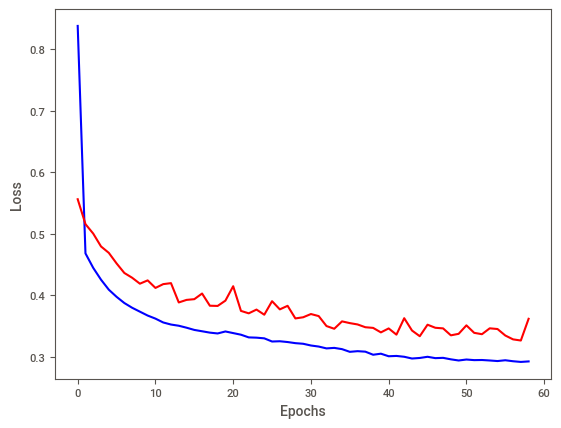

In [24]:
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(history.history['loss'], c='b')
plt.plot(history.history['val_loss'], c='r')
plt.show()

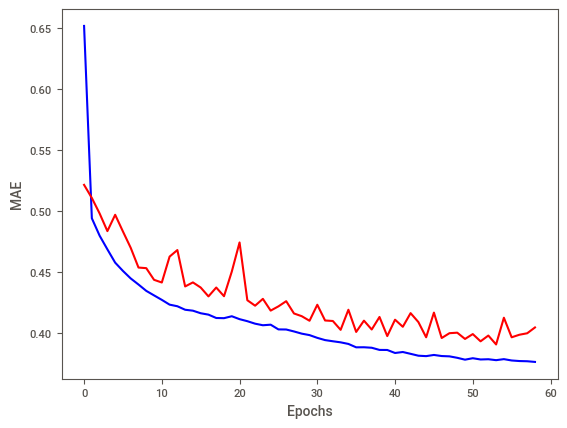

In [25]:
plt.xlabel('Epochs')
plt.ylabel('MAE')

plt.plot(history.history['mae'], c='b')
plt.plot(history.history['val_mae'], c='r')
plt.show()